# KMeans Clustering
### Taking in consideration of only Numerical Data Types

In [1]:
# Basic Libraries
#!pip install kmodes
#!pip install sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans

sb.set() # set the default Seaborn style for graphics

In [2]:
student_por = pd.read_csv('student-por.csv',sep=';')
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [3]:
for x in range(0,32):    
    col1 = student_por. iloc[:, x]
    print(student_por.columns.values[x])
    print(col1.value_counts())

school
GP    423
MS    226
Name: school, dtype: int64
sex
F    383
M    266
Name: sex, dtype: int64
age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64
address
U    452
R    197
Name: address, dtype: int64
famsize
GT3    457
LE3    192
Name: famsize, dtype: int64
Pstatus
T    569
A     80
Name: Pstatus, dtype: int64
Medu
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64
Fedu
2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
reason
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
guardian
mother    455
father    153
other      41
Name: guardian, dtype: int64
traveltime
1    366
2    213
3     54
4     16
Name: traveltime, dtype

In [4]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
student_por['age'] = student_por['age'].astype(float)
student_por['failures'] = student_por['failures'].astype(float)
student_por['absences'] = student_por['absences'].astype(float)
student_por['G1'] = student_por['G1'].astype(float)
student_por['G2'] = student_por['G2'].astype(float)
student_por['G3'] = student_por['G3'].astype(float)
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    float64
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    float64
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

### Selected Variables are as follows

In [6]:
selected = student_por[['age','failures','absences','G1','G2','G3']]
selected

,age,failures,absences,G1,G2,G3
0,18.0,0.0,4.0,0.0,11.0,11.0
1,17.0,0.0,2.0,9.0,11.0,11.0
2,15.0,0.0,6.0,12.0,13.0,12.0
3,15.0,0.0,0.0,14.0,14.0,14.0
4,16.0,0.0,0.0,11.0,13.0,13.0
...,...,...,...,...,...,...
644,19.0,1.0,4.0,10.0,11.0,10.0
645,18.0,0.0,4.0,15.0,15.0,16.0
646,18.0,0.0,6.0,11.0,12.0,9.0
647,17.0,0.0,6.0,10.0,10.0,10.0


# Performing Elbow Plot to obtain recommended number of clusters
When the slope is more gentle, information gain becomes constant and we choose optimal number of clusters before this happens

C:\Users\Alan Wong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'Score [WCSS]')

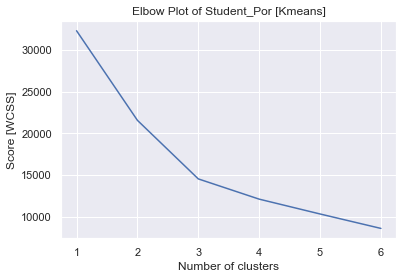

In [7]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(selected)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('Elbow Plot of Student_Por [Kmeans]')
plt.xlabel('Number of clusters')
plt.ylabel('Score [WCSS]')

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(selected)

In [9]:
pred_y
student_por['cluster'] = list(pred_y)

In [10]:
colors = ['#DF2020', '#81DF20', '#2095DF'] #Red, green, blue
student_por['c'] = student_por.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

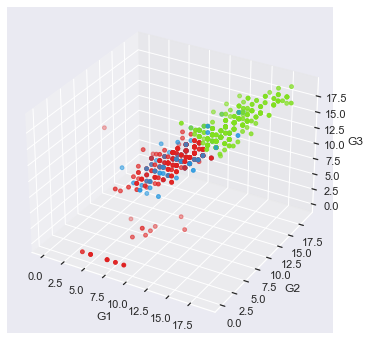

In [11]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(student_por.G1, student_por.G2, student_por.G3, c=student_por.c, s=15)
ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')
plt.show()

# As seen from plot above
Red has a cluster size of 261  
Green has a cluster size of 286  
Blue has a cluster size of 102  
Red has the smallest mean score for G1 to G3  
Green has the highest mean score for G1 to G3  
Blue is balanced between both clusters

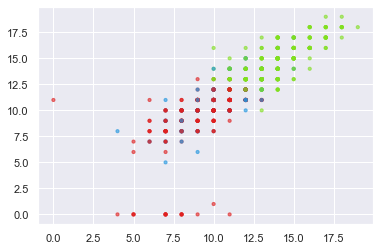

In [12]:
plt.scatter(student_por.G1, student_por.G3, c=student_por.c, alpha = 0.6, s=10)

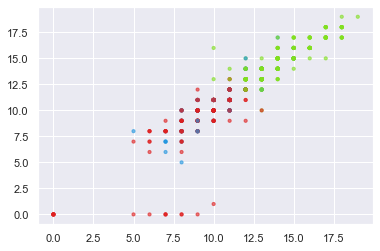

In [13]:
plt.scatter(student_por.G2, student_por.G3, c=student_por.c, alpha = 0.6, s=10)

In [14]:
catdf = pd.read_csv('student-por.csv',sep=';')
catdf['Medu'] = student_por['Medu'].astype(object)
catdf['Fedu'] = student_por['Fedu'].astype(object)
catdf['traveltime'] = student_por['traveltime'].astype(object)
catdf['studytime'] = student_por['studytime'].astype(object)
catdf['famrel'] = student_por['famrel'].astype(object)
catdf['freetime'] = student_por['freetime'].astype(object)
catdf['goout'] = student_por['goout'].astype(object)
catdf['Dalc'] = student_por['Dalc'].astype(object)
catdf['Walc'] = student_por['Walc'].astype(object)
catdf['health'] = student_por['health'].astype(object)
catdf['cluster'] = student_por['cluster'].astype(object)
catdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    object
 7   Fedu        649 non-null    object
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    object
 13  studytime   649 non-null    object
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [15]:
cluster1 = catdf[student_por['cluster'] == 0]
cluster2 = catdf[student_por['cluster'] == 1]
cluster3 = catdf[student_por['cluster'] == 2]

In [16]:
print(cluster1.shape)
print(cluster2.shape)
print(cluster3.shape)

(261, 34)
(286, 34)
(102, 34)


In [17]:
cluster1.describe()

,age,failures,absences,G1,G2,G3
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,16.720307,0.371648,2.114943,9.402299,9.463602,9.609195
std,1.241250,0.736285,2.116375,1.783211,2.132987,2.765264
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,8.000000,9.000000,9.000000
50%,17.000000,0.000000,2.000000,10.000000,10.000000,10.000000
75%,18.000000,1.000000,4.000000,11.000000,11.000000,11.000000
max,21.000000,3.000000,8.000000,13.000000,13.000000,13.000000


In [18]:
cluster2.describe()

,age,failures,absences,G1,G2,G3
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,16.573427,0.017483,2.073427,13.702797,13.979021,14.465035
std,1.108117,0.155739,2.582979,1.776788,1.821773,1.752342
min,15.000000,0.000000,0.000000,10.000000,10.000000,10.000000
25%,16.000000,0.000000,0.000000,12.000000,13.000000,13.000000
50%,17.000000,0.000000,1.000000,14.000000,14.000000,14.000000
75%,17.000000,0.000000,4.000000,15.000000,15.000000,16.000000
max,20.000000,2.000000,10.000000,19.000000,19.000000,19.000000


In [19]:
cluster3.describe()

,age,failures,absences,G1,G2,G3
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,17.284314,0.411765,12.058824,10.049020,10.205882,10.607843
std,1.307840,0.762395,4.825312,2.021554,1.900173,2.176185
min,15.000000,0.000000,8.000000,4.000000,5.000000,5.000000
25%,17.000000,0.000000,8.000000,9.000000,9.000000,9.250000
50%,17.000000,0.000000,10.000000,10.000000,10.000000,10.000000
75%,18.000000,1.000000,14.000000,11.750000,11.000000,12.000000
max,22.000000,3.000000,32.000000,15.000000,15.000000,17.000000


In [20]:
def checkpercent(columnname):
    frame = pd.crosstab(index=columnname, columns='count')
    #health = health['count']
    frame['index'] = frame.index
    total = sum(frame['count'])
    percentages = []
    for i in (frame.index):
        percentages.append(frame['count'][i]/total*100)
    frame['percent'] = percentages
    print(frame)

In [21]:
for i in student_por:
    #if(student_por[i])
    print(i)
    checkpercent(cluster1[i])
    checkpercent(cluster2[i])
    checkpercent(cluster3[i])
    print()
    print()
    print()

school
col_0   count index    percent
school                        
GP        128    GP  49.042146
MS        133    MS  50.957854
col_0   count index    percent
school                        
GP        218    GP  76.223776
MS         68    MS  23.776224
col_0   count index    percent
school                        
GP         77    GP  75.490196
MS         25    MS  24.509804



sex
col_0  count index    percent
sex                          
F        138     F  52.873563
M        123     M  47.126437
col_0  count index    percent
sex                          
F        187     F  65.384615
M         99     M  34.615385
col_0  count index    percent
sex                          
F         58     F  56.862745
M         44     M  43.137255



age
col_0  count  index    percent
age                           
15        47     15  18.007663
16        76     16  29.118774
17        67     17  25.670498
18        48     18  18.390805
19        21     19   8.045977
20         1     20   0.383142

col_0     count  index    percent
failures                         
0            72      0  70.588235
1            23      1  22.549020
2             2      2   1.960784
3             5      3   4.901961



schoolsup
col_0      count index    percent
schoolsup                        
no           228    no  87.356322
yes           33   yes  12.643678
col_0      count index   percent
schoolsup                       
no           258    no  90.20979
yes           28   yes   9.79021
col_0      count index    percent
schoolsup                        
no            95    no  93.137255
yes            7   yes   6.862745



famsup
col_0   count index    percent
famsup                        
no        109    no  41.762452
yes       152   yes  58.237548
col_0   count index    percent
famsup                        
no        108    no  37.762238
yes       178   yes  62.237762
col_0   count index    percent
famsup                        
no         34    no  33.333333
yes        68   yes  66.6666

13         3     13   1.149425
col_0  count  index    percent
G1                            
10         5     10   1.748252
11        20     11   6.993007
12        50     12  17.482517
13        63     13  22.027972
14        69     14  24.125874
15        33     15  11.538462
16        22     16   7.692308
17        16     17   5.594406
18         7     18   2.447552
19         1     19   0.349650
col_0  count  index    percent
G1                            
4          1      4   0.980392
6          1      6   0.980392
7          9      7   8.823529
8         13      8  12.745098
9         14      9  13.725490
10        24     10  23.529412
11        14     11  13.725490
12        16     12  15.686275
13         6     13   5.882353
14         2     14   1.960784
15         2     15   1.960784



G2
col_0  count  index    percent
G2                            
0          7      0   2.681992
5          2      5   0.766284
6          7      6   2.681992
7         10      7   3.831418
8 

KeyError: 'c'

In [22]:
def percent(columnname):
    df = pd.DataFrame()
    frame = pd.crosstab(index=columnname, columns='count')
    #health = health['count']
    frame['index'] = frame.index
    total = sum(frame['count'])
    percentages = []
    for i in (frame.index):
        percentages.append(frame['count'][i]/total*100)
    frame['percent'] = percentages
    df['Variables'] = frame['index']
    df['Percentages'] = frame['percent']
    return df

In [23]:
def plot (varname):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    axs[0].set_ylim([0,100])
    axs[1].set_ylim([0,100])
    axs[2].set_ylim([0,100])
    newdf1 = pd.DataFrame()
    newdf2 = pd.DataFrame()
    newdf3 = pd.DataFrame()
    newdf1 = percent(cluster1[varname])
    newdf2 = percent(cluster2[varname])
    newdf3 = percent(cluster3[varname])
    axs[0].set_xlim([1,len(newdf1.iloc[:,0].value_counts())])
    axs[1].set_xlim([1,len(newdf2.iloc[:,0].value_counts())])
    axs[2].set_xlim([1,len(newdf3.iloc[:,0].value_counts())])
    axs[0].set_title('Cluster 1 - {size} entries'.format(size = len(cluster1)))
    axs[1].set_title('Cluster 2 - {size} entries'.format(size = len(cluster2)))
    axs[2].set_title('Cluster 3 - {size} entries'.format(size = len(cluster3)))
    newdf1[['Percentages']].plot(ax=axs[0], kind='bar')
    newdf2[['Percentages']].plot(ax=axs[1], kind='bar')
    newdf3[['Percentages']].plot(ax=axs[2], kind='bar')


## Focused Plots that show the prominent variable based on the percentage
Plots are for those variables not detected to have high correlation in previous analysis

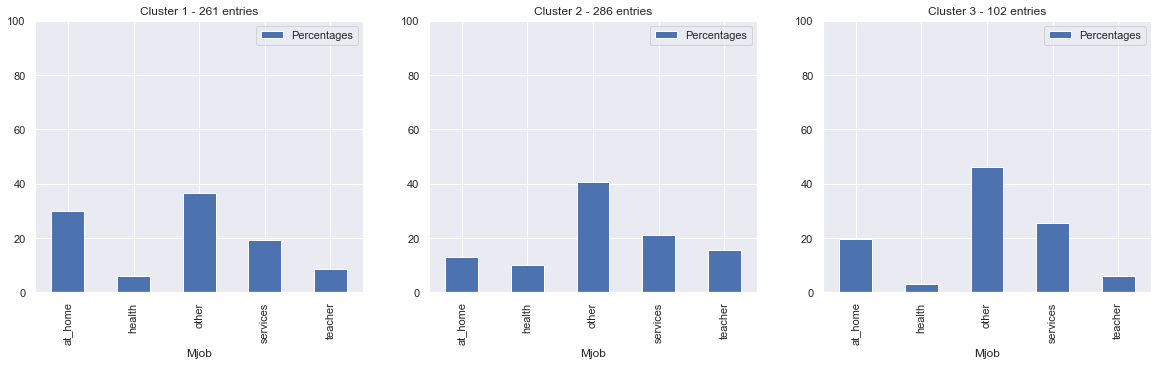

In [24]:
plot('Mjob')

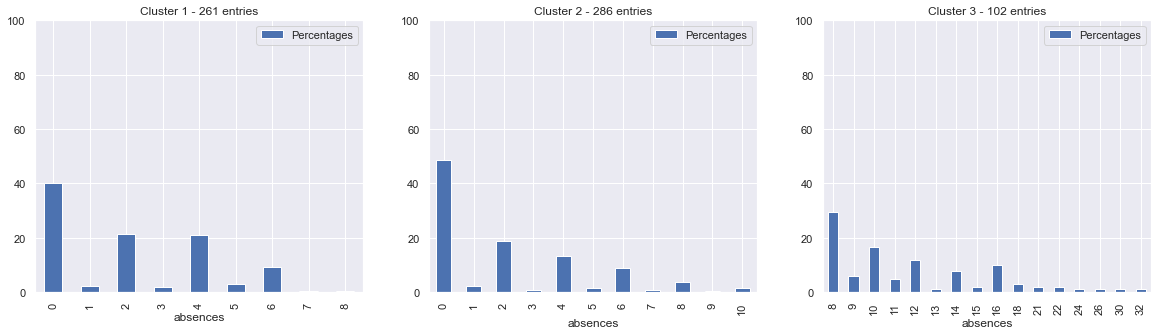

In [25]:
plot('absences')